## L200921 (Aisha Muhammad Nawaz)
## Digital Image Processing 
## Spring 2024 Assignment 3 BSCS 6B
## Due: 28th April 2024 (Sunday)

#### Q: Furnish the following using appropriate GUI:
#### 1. Pseudomedian filter

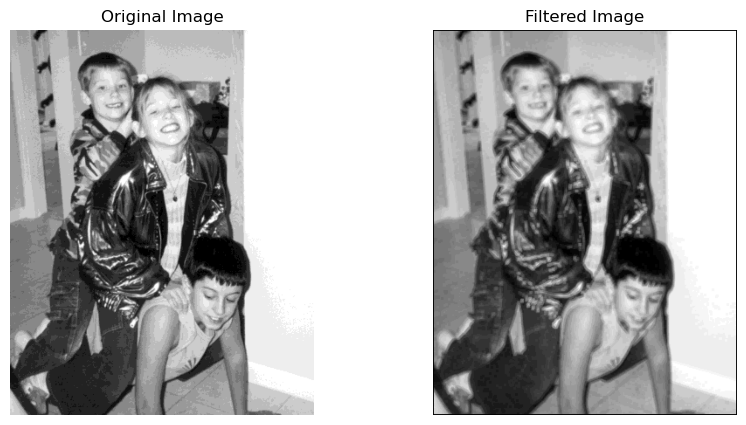

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pseudomedian(sequence):
    M = len(sequence)+1//2
    maximin = float('-inf')
    minimax = float('inf')
    
    # Iterating over all possible sequences of length M within the neighborhood
    for i in range(len(sequence) - M + 1):
        subsequence = sequence[i:i+M]
        maximin = max(maximin, min(subsequence))
        minimax = min(minimax, max(subsequence))
    
    return 0.5 * maximin + 0.5 * minimax

def pseudomedianFilter(img, filterSize=3):
    filteredImage = np.zeros_like(img)

    for i in range(3):  # RGB channels
        for y in range(filterSize // 2, img.shape[0] - filterSize // 2):  # Exclude borders
            for x in range(filterSize // 2, img.shape[1] - filterSize // 2):
                # neighborhood exraction
                neighborhood = img[y-filterSize//2:y+filterSize//2+1, x-filterSize//2:x+filterSize//2+1, i].flatten()
                # Calculating pseudomedian
                filteredImage[y, x, i] = pseudomedian(neighborhood)

    return filteredImage

def applyPseudomedianFilter(imgName, filterSize):
    img = cv2.imread(imgName)
    result = pseudomedianFilter(img, filterSize)

    # Displaying original and filtered images side by side for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Filtered Image")
    plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

imgName = 'image.png'
filterSize = 3  
applyPseudomedianFilter(imgName, filterSize)

#### 2. MMSE filter (with all possible Scenarios).

Greater Local Variance


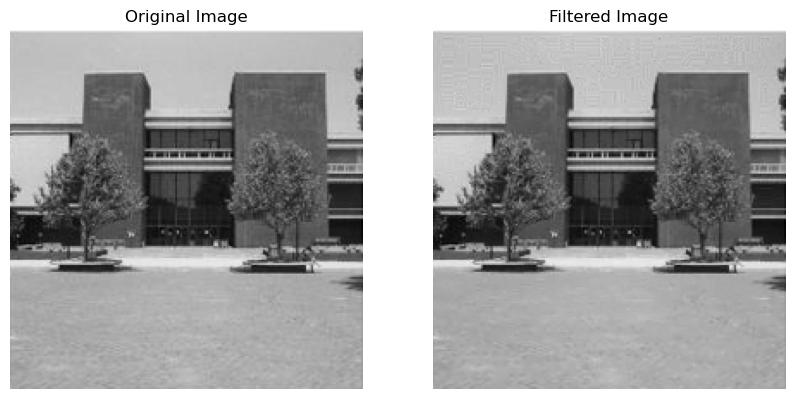

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def mmseFilter(image, NoiseVariance, windowSize,noiseVarEqual=False):
    
    filteredImage = np.zeros_like(image, dtype=np.float32)
    count=0
    # Padding the image so as to be able to handle the borders
    paddedImage = cv2.copyMakeBorder(image, windowSize // 2, windowSize // 2, windowSize // 2, windowSize // 2, cv2.BORDER_REFLECT)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixelValue = image[i, j]
            
            windowLocal = paddedImage[i:i+windowSize, j:j+windowSize] #Getting local window values
            
            localVariance = np.var(windowLocal) #Calculating Local Variance in the window under consideration
            localMean = np.mean(windowLocal)    #Calculating local Mean (Average in the window under consideration)
            if(noiseVarEqual): #Means noise variance is equal to local variance, ignores whatever value is passed
                NoiseVariance=localVariance
                
            if(NoiseVariance==localVariance and count==0):
                count=count+1
                print('Noise Variance is Equal to Local Variance')
            elif(NoiseVariance==0  and count==0):
                count=count+1 #So that only displays the case once
                print("Noise Variance is Zero")
            elif(NoiseVariance>localVariance and count==0):
                count=count+1 #So that only displays the case once
                print("Greater Noise Variance")
            elif(count==0):
                count=count+1 #So that only displays the case once
                print("Greater Local Variance")
            
            if NoiseVariance == 0 or localVariance == 0: # Skip filtering if NoiseVariance or localVariance is zero
                filteredImage[i, j] = pixelValue
            else:
                Noise2LocalVarianceRatio = noiseVariance / localVariance
                filteredImage[i, j] = pixelValue - Noise2LocalVarianceRatio * (pixelValue - localMean)
    
    return filteredImage.astype(np.uint8)

def applyMMSE(imageName, noiseVariance, windowSize,noiseVarEqual=False):
    image = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE) #Loadding Image    
    result = mmseFilter(image, noiseVariance, windowSize,noiseVarEqual)
    
    # Displaying original and filtered images side by side for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Filtered Image")
    plt.imshow(result, cmap='gray')
    plt.axis('off')

    plt.show()


imageName = 'image2.png'
noiseVariance = 4 
windowSize = 3  
applyMMSE(imageName, noiseVariance, windowSize)

# Scenario 1: 0 noise in image

Noise Variance is Zero


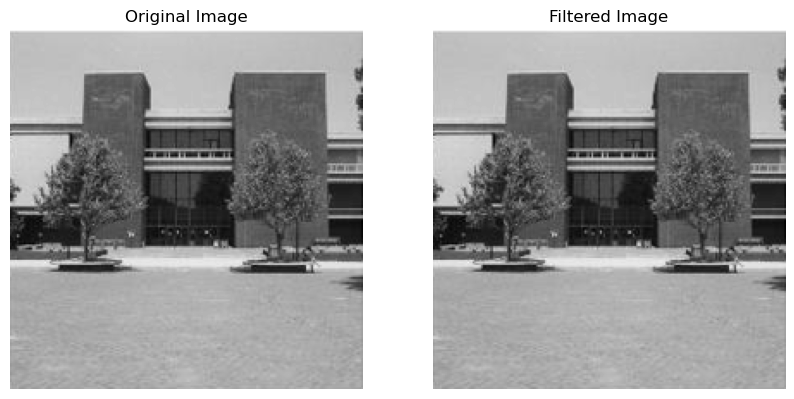

In [3]:
imageName = 'image2.png'
noiseVariance = 0 
windowSize = 3  
applyMMSE(imageName, noiseVariance, windowSize)

# Scenario 2: Noise variance equals local variance (Mean filter)

Noise Variance is Equal to Local Variance


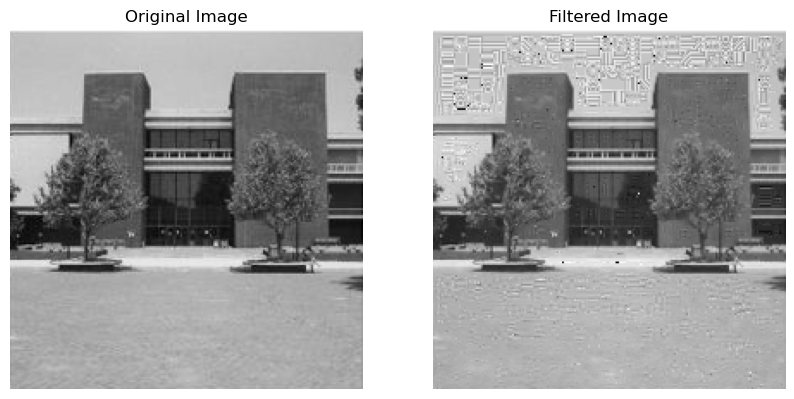

In [4]:
imageName = 'image2.png'
noiseVariance = 20
windowSize = 3  
applyMMSE(imageName, noiseVariance, windowSize,True)#Means equal noise variance and local variance, ignores whatever noise passed

# Scenario 3: Local variance greater than noise variance

Greater Local Variance


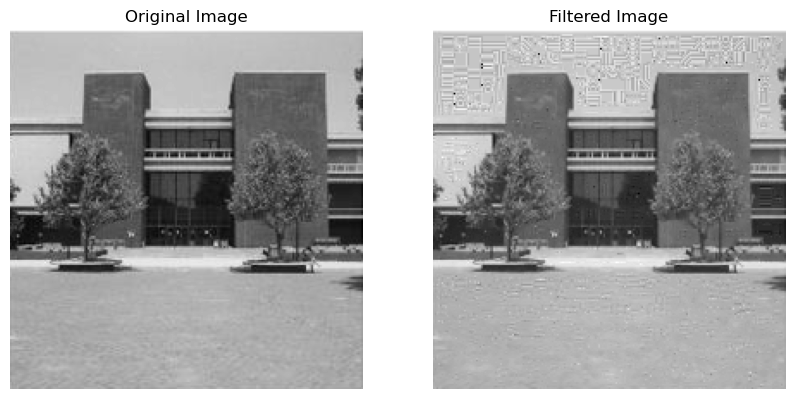

In [5]:
imageName = 'image2.png'
noiseVariance = 15
windowSize = 3  
applyMMSE(imageName, noiseVariance, windowSize)

# Scenario 4: Noise variance greater than local variance

Greater Noise Variance


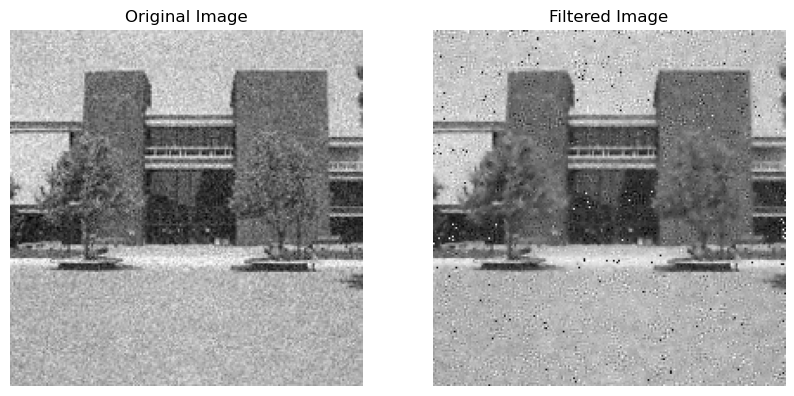

In [6]:
imageName = 'image2b.png'
noiseVariance = 300 #Given in slides
windowSize = 3  
applyMMSE(imageName, noiseVariance, windowSize)

# GUI

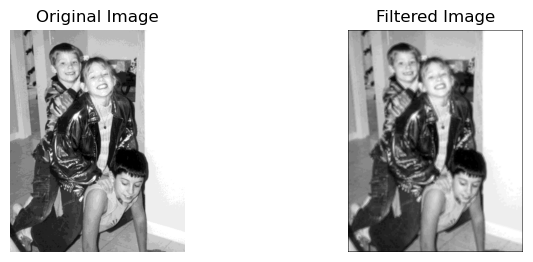

In [15]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import Image, ImageTk


def applyPseudomedianFilter(imgName, filterSize):
    img = cv2.imread(imgName)
    result = pseudomedianFilter(img, filterSize)

    # Display original and filtered images side by side for comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title("Original Image")
    ax1.axis('off')

    ax2.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))
    ax2.set_title("Filtered Image")
    ax2.axis('off')

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()


def applyMMSEFilter(imgName, noiseVariance, windowSize,noiseVarianceEq):
    image = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)
    result = mmseFilter(image, noiseVariance, windowSize,noiseVarianceEq)

    # Display original and filtered images side by side for comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image, cmap='gray')
    ax1.set_title("Original Image")
    ax1.axis('off')

    ax2.imshow(result, cmap='gray')
    ax2.set_title("Filtered Image")
    ax2.axis('off')

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()


def open_file(typeFilter, noiseEntry, windowEntry,noiseEntry2):
    filePath = filedialog.askopenfilename()
    if filePath:
        nv=noiseEntry.get()
        nv2=noiseEntry2.get()
        ws=windowEntry.get()
        noiseVariance =  float(nv) if nv else 0
        noiseVariance2 =  True if 'yes' == nv2.lower() else False
        windowSize = int(ws) if ws else 3
        if typeFilter == "Pseudomedian":
            applyPseudomedianFilter(filePath, windowSize)
        elif typeFilter == "MMSE":
            applyMMSEFilter(filePath, noiseVariance, windowSize,noiseVariance2)


root = tk.Tk()
root.title("Image Filtering")
root.geometry("800x500")

# Label and Entry for Noise Variance
noise_label = tk.Label(root, text="Noise Variance:")
noise_label.pack()
noiseEntry = tk.Entry(root)
noiseEntry.pack()

# Label and Entry for Noise Variance equal Local Variance
noise_label2 = tk.Label(root, text="Noise Variance Equal Local Variance? (Yes/No):")
noise_label2.pack()
noiseEntry2 = tk.Entry(root)
noiseEntry2.pack()

# Label and Entry for Window Size
window_label = tk.Label(root, text="Window Size:")
window_label.pack()
windowEntry = tk.Entry(root)
windowEntry.pack()

pseudomedian_button = tk.Button(root, text="Pseudomedian Filter", command=lambda: open_file("Pseudomedian", noiseEntry, windowEntry,noiseEntry2))
pseudomedian_button.pack(pady=10)

mmse_button = tk.Button(root, text="MMSE Filter", command=lambda: open_file("MMSE", noiseEntry, windowEntry,noiseEntry2))
mmse_button.pack(pady=10)

root.mainloop()